In [1]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
#import membershipFunctions as MBF

In [2]:
#input range

"""1
班次間隔至少11小時
"""

x_interval_range = np.arange(0,29,1,np.float32)

""" 2
Mon D班別符合人力需求 30人
"""

x_Mon_D_range = np.arange(0,31,1,np.float32)

"""
output
"""
y_finalvalue_range = np.arange(0,10,1,np.float32)

#control value

x_interval = ctrl.Antecedent(x_interval_range,'interval_11hr')
x_Mon_D = ctrl.Antecedent(x_Mon_D_range,'Mon:D(30)')
y_finalvalue = ctrl.Consequent(y_finalvalue_range,'final_value')


x_interval['low'] = fuzz.membership.trimf(x_interval_range,[0,0,11])
x_interval['medium'] = fuzz.membership.trimf(x_interval_range,[9,11,14])
x_interval['high'] = fuzz.membership.trimf(x_interval_range,[11,28,28])

x_Mon_D ['low'] = fuzz.membership.trimf(x_Mon_D_range,[0,0,25])
x_Mon_D ['medium'] = fuzz.membership.trimf(x_Mon_D_range,[23,25,28])
x_Mon_D ['high'] = fuzz.membership.trimf(x_Mon_D_range,[25,30,30])

y_finalvalue['low'] = fuzz.membership.trimf(y_finalvalue_range,[0,0,5])
y_finalvalue['medium'] = fuzz.membership.trimf(y_finalvalue_range,[3,5,7])
y_finalvalue['high'] = fuzz.membership.trimf(y_finalvalue_range,[5,10,10])


In [3]:
interval = {"1":x_interval['low'],"2":x_interval['medium']}

In [4]:
interval.get("1")

interval_11hr[low]

c:\Users\laimm\anaconda3\envs\jubo\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(None, None, None)

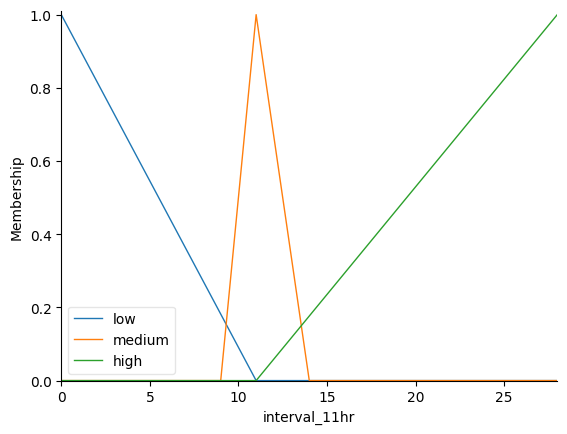

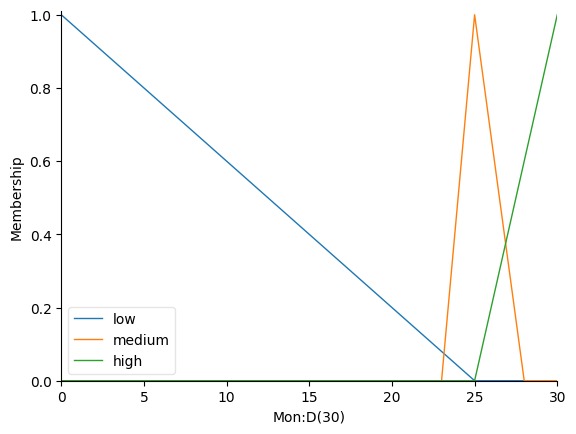

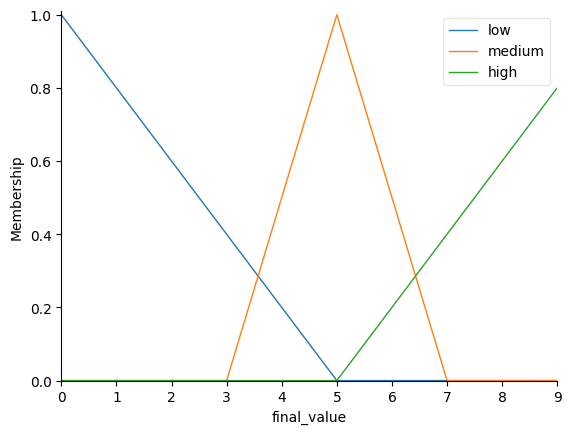

In [5]:
x_interval.view(),x_Mon_D.view(),y_finalvalue.view()

In [6]:
y_finalvalue.defuzzify_method = 'centroid'

In [7]:
#RULE: low

rule_low = ctrl.Rule(antecedent=((x_interval['low'] & x_Mon_D['low'])   |
                                 (x_interval['low'] & x_Mon_D['medium'])|
                                 (x_interval['low'] & x_Mon_D['high'])  |
                                 (x_interval['medium'] & x_Mon_D['low'])|
                                 (x_interval['high'] & x_Mon_D['low']) ),
                    consequent=y_finalvalue['low'],label='low')


#RULE: medium

rule_medium = ctrl.Rule(antecedent=((x_interval['medium'] &x_Mon_D['medium']) | (x_interval['medium'] & x_Mon_D['high'])) | (x_interval['high'] & x_Mon_D['medium']),
                        consequent=y_finalvalue['medium'],label='medium')

#RULE: high

rule_high = ctrl.Rule(antecedent=((x_interval['high'] & x_Mon_D['high'])),
                    consequent=y_finalvalue['high'],label='high')

In [8]:
#initialization

system = ctrl.ControlSystem(rules = [rule_low,rule_medium,rule_high])
SA = ctrl.ControlSystemSimulation(system)

In [9]:
#run system
SA.input['interval_11hr'] = 11
SA.input['Mon:D(30)'] = 28

SA.compute()
output_value = SA.output

In [10]:
output_value

OrderedDict([('final_value', 5.0)])

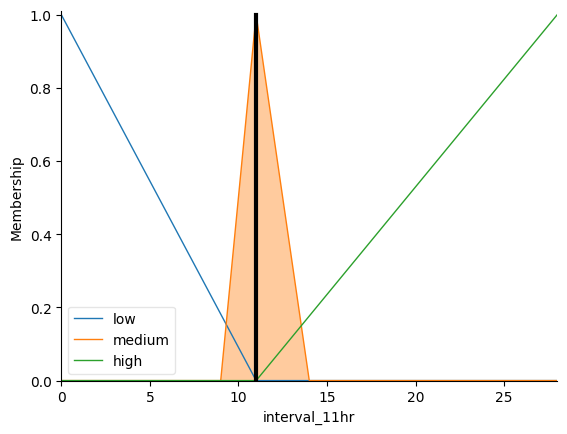

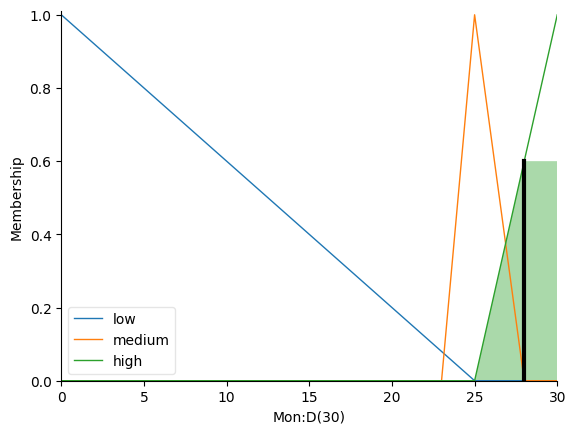

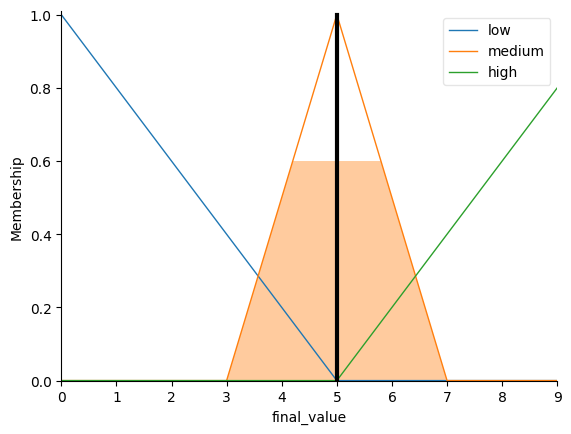

In [11]:
x_interval.view(sim=SA)
x_Mon_D.view(sim=SA)
y_finalvalue.view(sim=SA)

In [18]:

from skfuzzy.control.controlsystem import CrispValueCalculator
rule_number = {}
for c in SA.ctrl.consequents:
    for term in c.terms.values():
            print("  %s:" % term.label)
            for cut_rule, cut_value in term.cuts[SA].items():
                    if cut_rule not in rule_number.keys():
                        continue
                    print("    {0:>32} : {1}".format(rule_number[cut_rule],cut_value))
                    accu = "Accumulate using %s" % c.accumulation_method.func_name
                    print("    {0:>32} : {1}".format(accu,term.membership_value[SA]))
            print("")

  low:

  medium:

  high:

